# Healthcare Diabetes Dataset

In [3]:
# importing the excel sheet to begin data analysis

import pandas as pd
alldata = pd.read_csv(r'C:\Users\34661\Downloads\Healthcare-Diabetes.csv')
alldata.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning

In [4]:
nan_data = alldata[alldata.isna().any(axis = 1)]
nan_data

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# Descriptive Analysis

# 1. Average Age, BMI, Glucose level of individuals in the dataset.

In [61]:
average_age = round(alldata['Age'].mean())
average_bmi = round(alldata['BMI'].mean(),2)
glucose = round(alldata['Glucose'].mean(),2)


print('Average Age is', average_age)
print('Average BMI is', average_bmi)
print('Average Glucose Level of an individual is', glucose)

Average Age is 33
Average BMI is 32.14
Average Glucose Level of an individual is 121.1


In [63]:
alldata.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes
0,1,6,148,72,35,0,33.6,0.627,50,1,Yes
1,2,1,85,66,29,0,26.6,0.351,31,0,No
2,3,8,183,64,0,0,23.3,0.672,32,1,Yes
3,4,1,89,66,23,94,28.1,0.167,21,0,No
4,5,0,137,40,35,168,43.1,2.288,33,1,Yes


# 2. Distribution of Glucose Levels varying among individuals with and without diabetes

Diabetes Distribution diabetes
No     1816
Yes     952
Name: count, dtype: int64


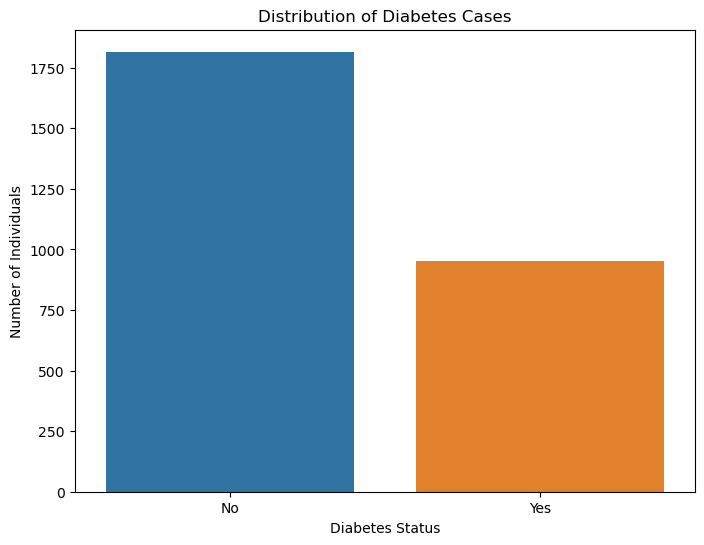

C:\Users\34661\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34661\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


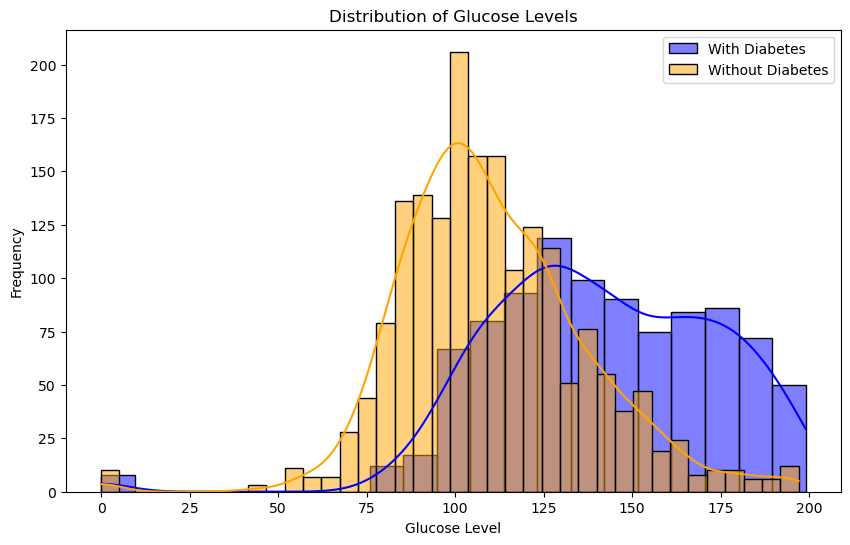

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I created a  column 'diabetes' where the value is 1 if Outcome is 1 (diabetes), otherwise 0
alldata['diabetes'] = np.where(alldata['Outcome'] == 1,'Yes','No')

# Diabetes Distribution
diabetes_distribution = alldata['diabetes'].value_counts()
print('Diabetes Distribution', diabetes_distribution)

# Visualizing the diabetes distribution
plt.figure(figsize=(8,6))
sns.barplot(x= diabetes_distribution.index, y = diabetes_distribution.values)
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Individuals')

plt.show()

# Visualizing glucose levels
# Seperating datasets for individuals with and without diabetes
with_diabetes = alldata[alldata['diabetes'] == 'Yes']
without_diabetes = alldata[alldata['diabetes'] == 'No']

# Visualizing distribution of glucose levels using histograms
plt.figure(figsize=(10,6))
sns.histplot(data=with_diabetes,x='Glucose', color='blue', label='With Diabetes', kde=True)
sns.histplot(data=without_diabetes,x='Glucose', color='orange', label='Without Diabetes', kde=True)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 3. Can you visualize distribution of BMI among different age groups?

In [89]:
# a) Visualizing 

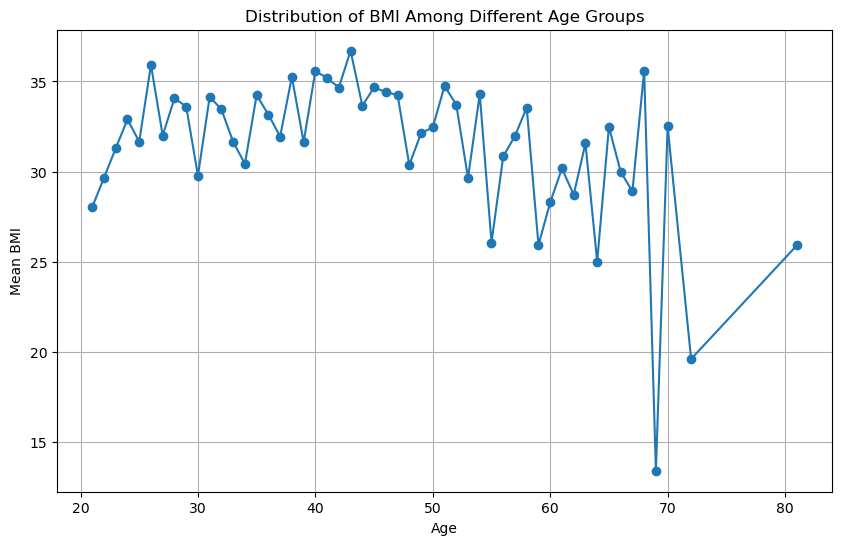

In [88]:

bmi = alldata.groupby('Age')['BMI'].mean().reset_index()
bmi_sort = bmi.sort_values(by='Age', ascending = False)
bmi_sort.head()

plt.figure(figsize=(10,6))
plt.plot(bmi_sort['Age'], bmi_sort['BMI'], marker = 'o', linestyle ='-')
plt.title('Distribution of BMI Among Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Mean BMI')
plt.grid(True)
plt.show()

In [90]:
# b) Checking/confirming whether if there is any effect of bmi levels among different age groups.

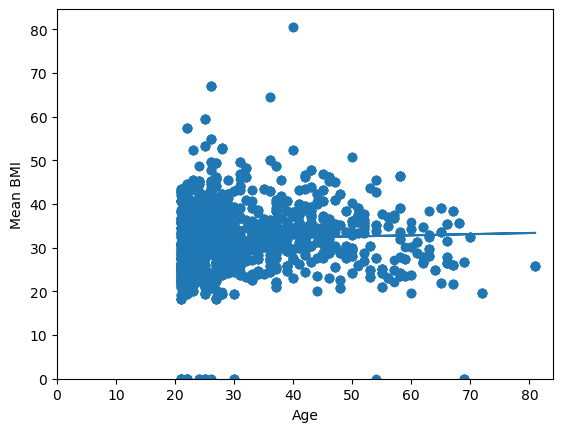

In [91]:
# Linear regression!!
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

x = alldata['Age']
y = alldata['BMI']

slope, intercept, r,p, std_err = stats.linregress(x,y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x,y)
plt.plot(x, slope * x + intercept)
plt.ylim(ymin = 0)
plt.xlim(xmin = 0)
plt.xlabel('Age')
plt.ylabel('Mean BMI')
plt.show()

In [93]:
# Creation of regression table
import pandas as pd
import statsmodels.formula.api as smf

model = smf.ols('Age ~ BMI', data = alldata)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.037
Date:                Tue, 14 May 2024   Prob (F-statistic):             0.0446
Time:                        17:48:14   Log-Likelihood:                -10751.
No. Observations:                2768   AIC:                         2.151e+04
Df Residuals:                    2766   BIC:                         2.152e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.3431      0.918     34.138      0.0

# Coorelation Analysis

In [100]:
# a) Is there coorelation between BMI and glucose levels?

In [96]:
numeric_columns = alldata.select_dtypes(include=['float64', 'int64'])
corr_matrix = round(numeric_columns.corr(), 2)
print(corr_matrix)

                            Id  Pregnancies  Glucose  BloodPressure  \
Id                        1.00        -0.02     0.02           0.01   
Pregnancies              -0.02         1.00     0.12           0.15   
Glucose                   0.02         0.12     1.00           0.14   
BloodPressure             0.01         0.15     0.14           1.00   
SkinThickness             0.02        -0.07     0.06           0.20   
Insulin                   0.01        -0.08     0.32           0.09   
BMI                       0.02         0.02     0.23           0.28   
DiabetesPedigreeFunction -0.01        -0.03     0.13           0.05   
Age                      -0.01         0.54     0.26           0.24   
Outcome                  -0.01         0.22     0.46           0.07   

                          SkinThickness  Insulin   BMI  \
Id                                 0.02     0.01  0.02   
Pregnancies                       -0.07    -0.08  0.02   
Glucose                            0.06     

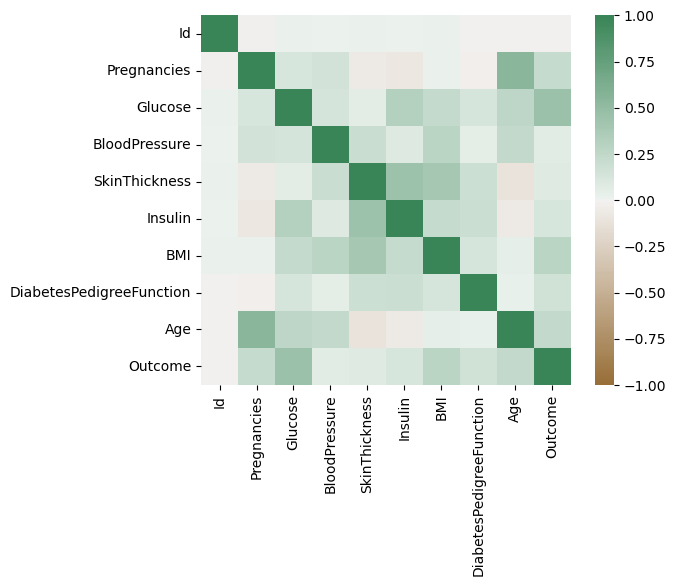

In [99]:
# using a heatmap

import matplotlib.pyplot as plt
import seaborn as sns

axis_corr = sns.heatmap(
    corr_matrix,
    vmin=-1,
    vmax = 1,
    center = 0,
    cmap=sns.diverging_palette(50,500, n=500),
    square = True
)
plt.show()

In [101]:
alldata.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes
0,1,6,148,72,35,0,33.6,0.627,50,1,Yes
1,2,1,85,66,29,0,26.6,0.351,31,0,No
2,3,8,183,64,0,0,23.3,0.672,32,1,Yes
3,4,1,89,66,23,94,28.1,0.167,21,0,No
4,5,0,137,40,35,168,43.1,2.288,33,1,Yes


# Feature Engineering

In [103]:
# Question: Are there any features that you can create such as BMI Categories, Glucose Levels, etc
import pandas as pd

# Creating a function to categorize BMI Values
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal weight'
    elif bmi < 30: 
        return 'Overweight'
    else:
        return 'Obese'

# Applying categorize_bmi function to create a new column 'weight_category'
alldata['weight_category'] = alldata['BMI'].apply(categorize_bmi)

alldata.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes,weight_category
0,1,6,148,72,35,0,33.6,0.627,50,1,Yes,Obese
1,2,1,85,66,29,0,26.6,0.351,31,0,No,Overweight
2,3,8,183,64,0,0,23.3,0.672,32,1,Yes,Normal weight
3,4,1,89,66,23,94,28.1,0.167,21,0,No,Overweight
4,5,0,137,40,35,168,43.1,2.288,33,1,Yes,Obese


BMI Category Distribution: weight_category
Obese            1704
Overweight        654
Normal weight     357
Underweight        53
Name: count, dtype: int64


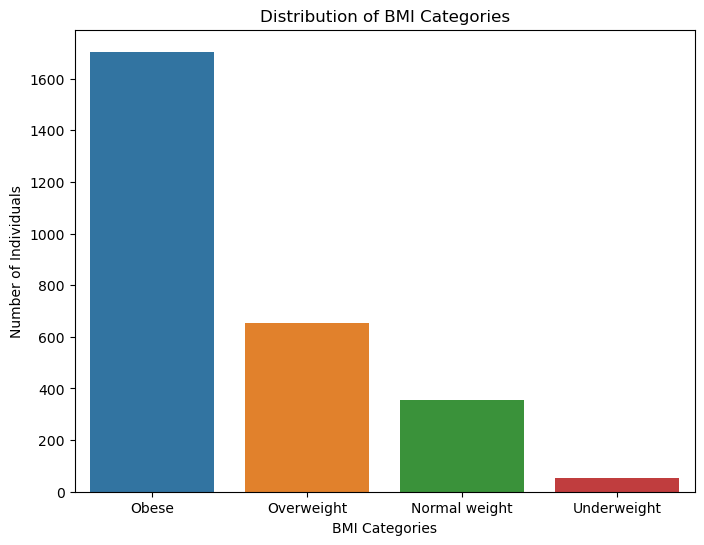

In [105]:
# Visualizing Data for BMI Category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bmi_distribution = alldata['weight_category'].value_counts()
print('BMI Category Distribution:' , bmi_distribution)


plt.figure(figsize=(8,6))
sns.barplot(x= bmi_distribution.index, y = bmi_distribution.values)
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Categories')
plt.ylabel('Number of Individuals')

plt.show()

In [107]:
# Question: Are there any features that you can create such as Glucose levels Categories (Low Glucose, Normal Glucose etc)
import pandas as pd

# Creating a function to categorize BMI Values
def categorize_glucose(bmi):
    if glucose < 70:
        return 'Low Glucose'
    elif glucose < 100:
        return 'Normal Glucose'
    elif bmi < 126: 
        return 'Pre-Diabetes'
    else:
        return 'Diabetese'

# Applying categorize_glucose function to create a new column 'weight_category'
alldata['glucose_category'] = alldata['Glucose'].apply(categorize_glucose)

alldata.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes,weight_category,glucose_category
0,1,6,148,72,35,0,33.6,0.627,50,1,Yes,Obese,Diabetese
1,2,1,85,66,29,0,26.6,0.351,31,0,No,Overweight,Pre-Diabetes
2,3,8,183,64,0,0,23.3,0.672,32,1,Yes,Normal weight,Diabetese
3,4,1,89,66,23,94,28.1,0.167,21,0,No,Overweight,Pre-Diabetes
4,5,0,137,40,35,168,43.1,2.288,33,1,Yes,Obese,Diabetese


Glucose Category glucose_category
Pre-Diabetes    1682
Diabetese       1086
Name: count, dtype: int64


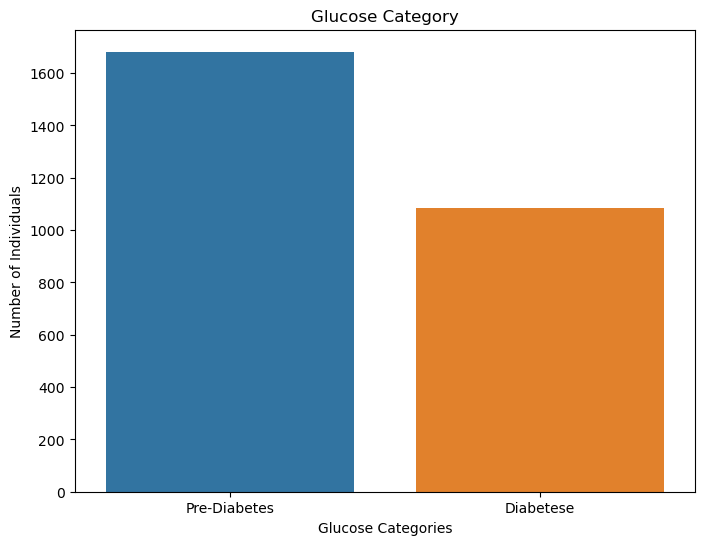

In [111]:
# Visualizing the data

import pandas as pandas
import matplotlib.pyplot as plt
import seaborn as sns

glucose_distribution = alldata['glucose_category'].value_counts()
print('Glucose Category', glucose_distribution)


plt.figure(figsize=(8,6))
sns.barplot(x=glucose_distribution.index, y = glucose_distribution.values)
plt.title('Glucose Category')
plt.xlabel('Glucose Categories')
plt.ylabel('Number of Individuals')

plt.show()

# Basic Statistical Analysis

In [127]:
# Performing linear regression to determine if there is relationship between BMI and Diabetes Outcome(1 showing Diabetic and 0 showing Non-Diabetic)

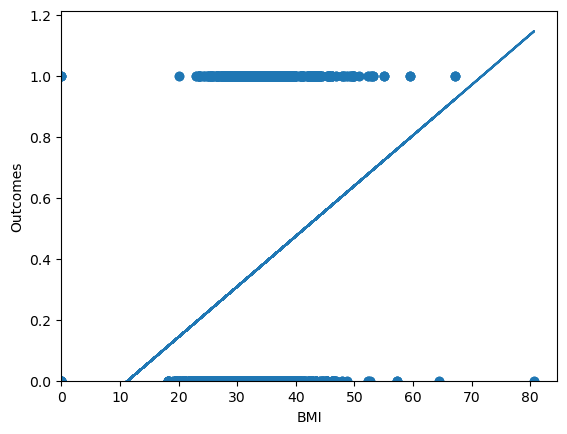

In [128]:
# Linear regression!!
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

x = alldata['BMI']
y = alldata['Outcome']

slope, intercept, r,p, std_err = stats.linregress(x,y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x,y)
plt.plot(x, slope * x + intercept)
plt.ylim(ymin = 0)
plt.xlim(xmin = 0)
plt.xlabel('BMI')
plt.ylabel('Outcomes')
plt.show()

In [129]:
# Creation of Regression Table

In [131]:
import pandas as pd
import statsmodels.formula.api as smf

model = smf.ols('BMI ~ Outcome', data = alldata)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     237.0
Date:                Wed, 15 May 2024   Prob (F-statistic):           2.26e-51
Time:                        01:22:10   Log-Likelihood:                -9595.5
No. Observations:                2768   AIC:                         1.919e+04
Df Residuals:                    2766   BIC:                         1.921e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4950      0.182    167.632      0.0